# Classificação de Segmentação de Clientes
link:https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation?select=Train.csv

**Contexto:**
Uma empresa automobilística tem planos de entrar em novos mercados com seus produtos existentes (P1, P2, P3, P4 e P5). Após intensa pesquisa de mercado, eles deduziram que o comportamento do novo mercado é semelhante ao mercado existente.

Em seu mercado existente, a equipe de vendas classificou todos os clientes em 4 segmentos (A, B, C, D). Em seguida, eles realizaram alcance e comunicação segmentados para um segmento diferente de clientes. Esta estratégia tem funcionado e excepcionalmente bem para eles. Eles planejam usar a mesma estratégia para os novos mercados e identificaram 2.627 novos clientes em potencial.

Precisamos identificar o perfil dos clientes para o novo gerente.


# Índice

1. Imports
2. Carga das bases de treino e teste
3. EDA
<br>
   3.1 Analisando a distribuição da segmentação da base df_train
<br>
   3.2 Análise de variáveis numéricas e dados ausentes
<br>
   3.3 Análise de variáveis categóricas
4. Análise biavariada
5. Análise Multivariada



# 1. Imports

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

# 2. Carga das bases de treino e teste

In [101]:
df_train = pd.read_csv('bases\\Train.csv')

In [102]:
df_test = pd.read_csv('bases\\Test.csv')

# 3. EDA

## Descrição das bases

In [24]:
df_train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


* ID: Um identificador único para cada entrada.
* Gender: O gênero da pessoa (Male ou Female).
* Ever_Married: Indica se a pessoa já se casou alguma vez (yes ou no).
* Age: A idade da pessoa.
* Graduated: Indica se a pessoa é graduada (yes ou no).
* Profession: A profissão da pessoa.
* Work_Experience: O tempo de experiência de trabalho da pessoa em anos.
* Spending_Score: O nível de gasto da pessoa (high, average ou low).
* Family_Size: O tamanho da família da pessoa.
* Var_1: Variável anonima.
* Segmentation: A segmentação atribuída a cada entrada.

## 3.1 Analisando a distribuição da segmentação da base df_train

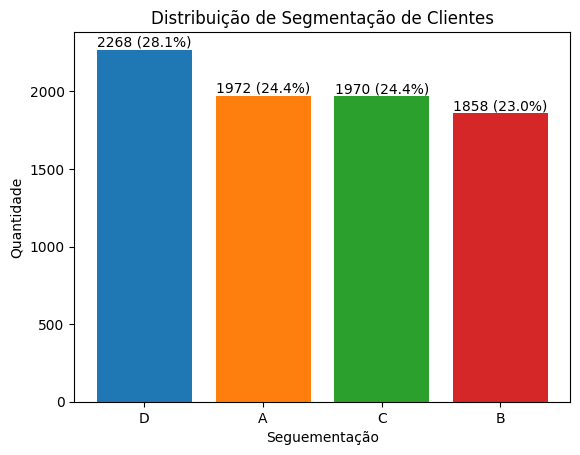

In [33]:
# Contar a frequência de cada categoria na coluna 'Segmentation'
segmentation_counts = df_train['Segmentation'].value_counts()

# Calcular percentuais
segmentation_percentages = (segmentation_counts / len(df_train)) * 100

# Definir uma paleta de cores com uma cor diferente para cada coluna
colors = plt.cm.tab10(np.arange(len(segmentation_counts)))

# Criar o gráfico de barras
plt.bar(segmentation_counts.index, segmentation_counts.values, color=colors)

# Adicionar rótulos com número absoluto e percentual em cada coluna
for i in range(len(segmentation_counts)):
    count = segmentation_counts[i]
    percentage = segmentation_percentages[i]
    label = f'{count} ({percentage:.1f}%)'
    plt.text(i, count, label, ha='center', va='bottom')

# Definir rótulos e título do gráfico
plt.xlabel('Seguementação')
plt.ylabel('Quantidade')
plt.title('Distribuição de Segmentação de Clientes')

# Mostrar o gráfico
plt.show()

Caso a base de clientes estivessem com a seguementação desbalanceada, concederaria utilizar alguma tecnica para balancear para o treinamento do modelos

## 3.2 Análise de variáveis numéricas e dados ausentes

<Axes: >

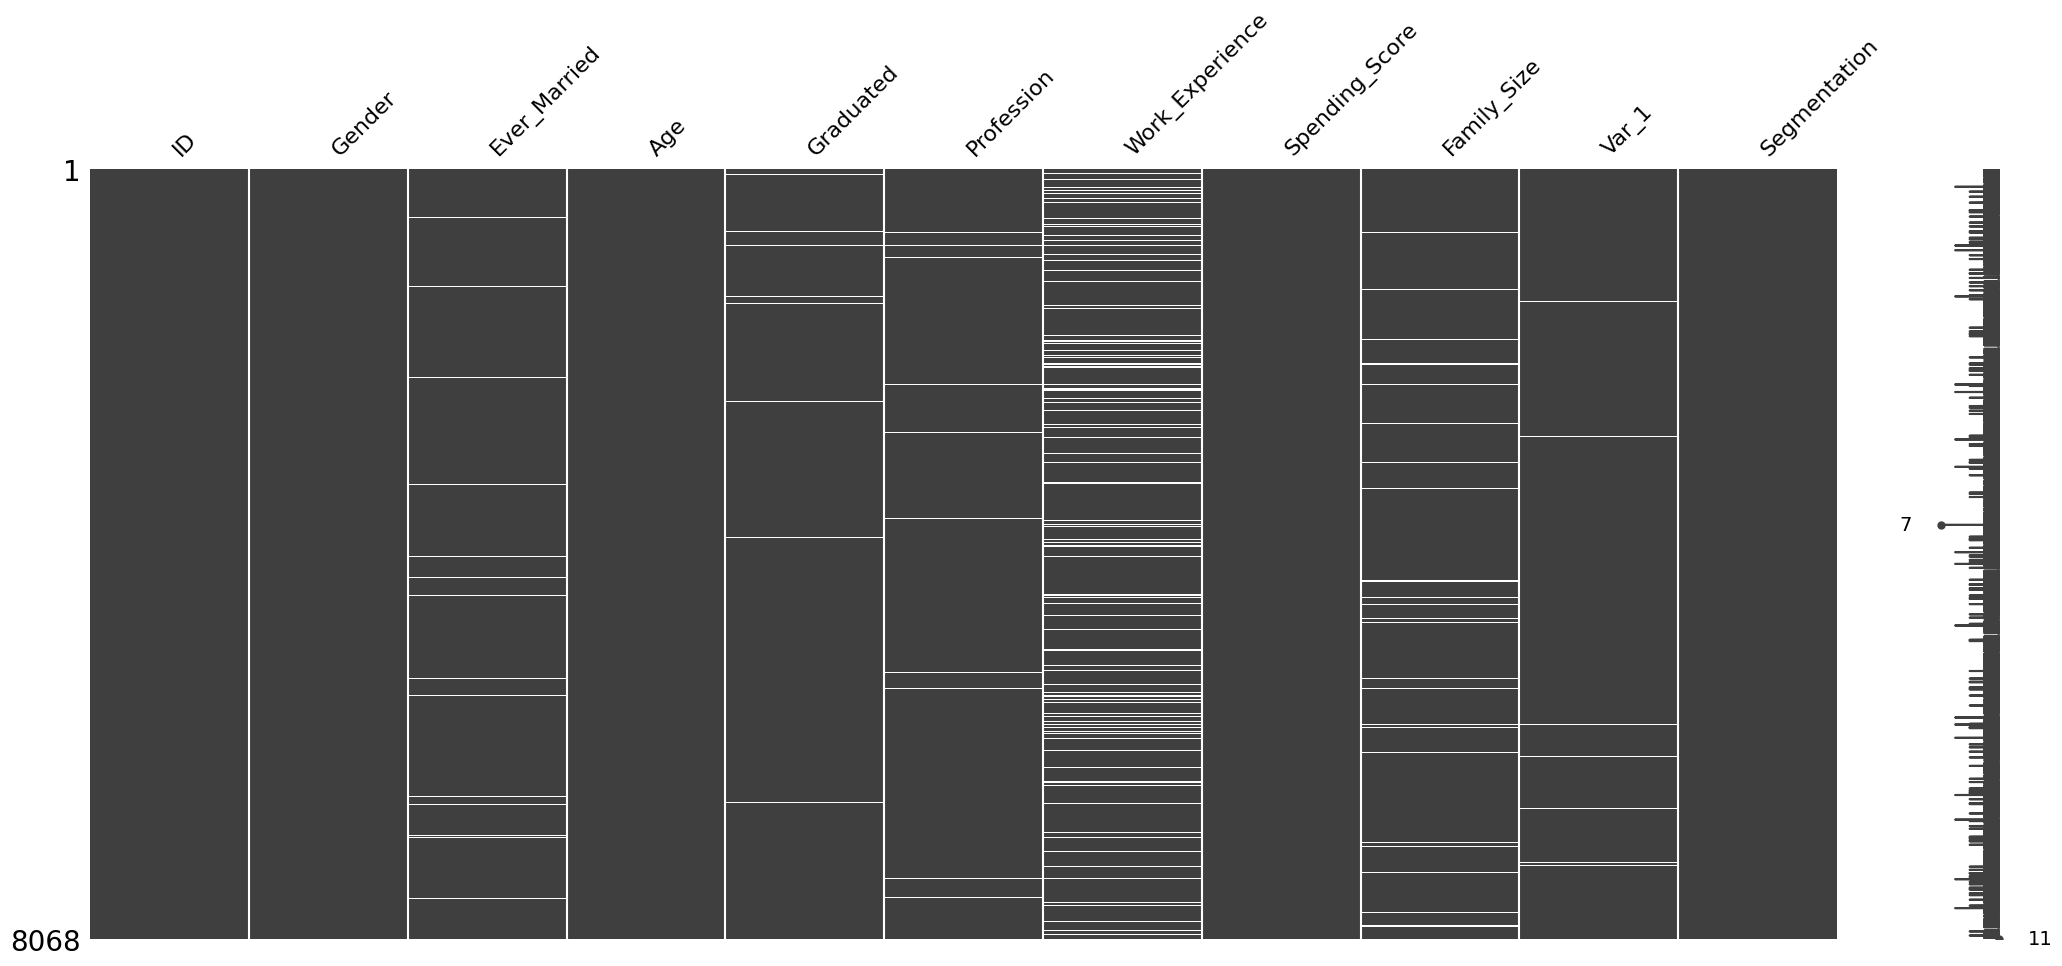

In [39]:
# Plotar o gráfico de matriz de dados ausentes
msno.matrix(df_train)

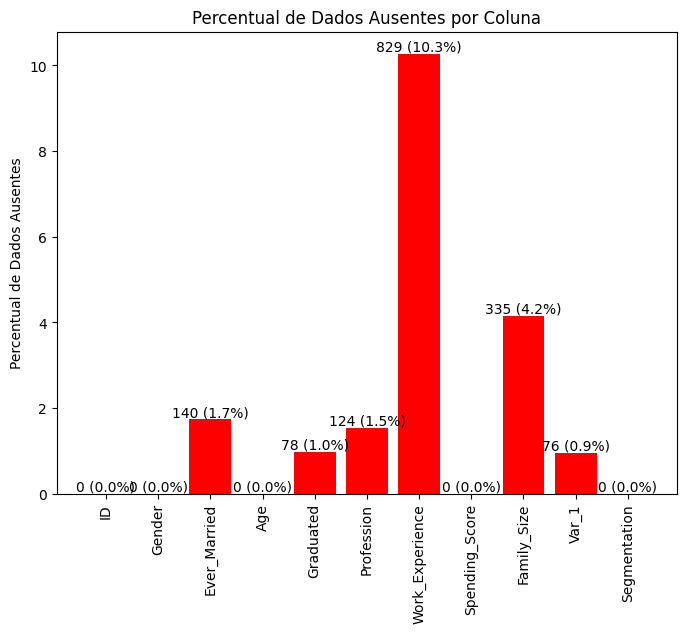

In [44]:
# Calcular o percentual de dados ausentes por coluna
missing_count = df_train.isnull().sum()
missing_percentage = (missing_count / len(df_train)) * 100

# Plotar o gráfico de barras do percentual de dados ausentes
plt.figure(figsize=(8, 6))
plt.bar(missing_percentage.index, missing_percentage.values, color='red')
plt.ylabel('Percentual de Dados Ausentes')
plt.title('Percentual de Dados Ausentes por Coluna')
plt.xticks(rotation='vertical')

# Adicionar rótulos com o número absoluto e o percentual em cada coluna
for i in range(len(missing_percentage)):
    count = missing_count[i]
    percentage = missing_percentage[i]
    label = f'{count} ({percentage:.1f}%)'
    plt.text(i, percentage, label, ha='center', va='bottom')

plt.show()

In [35]:
# estatísticas descritivas
df_train.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


## 3.3 Análise de variáveis categóricas

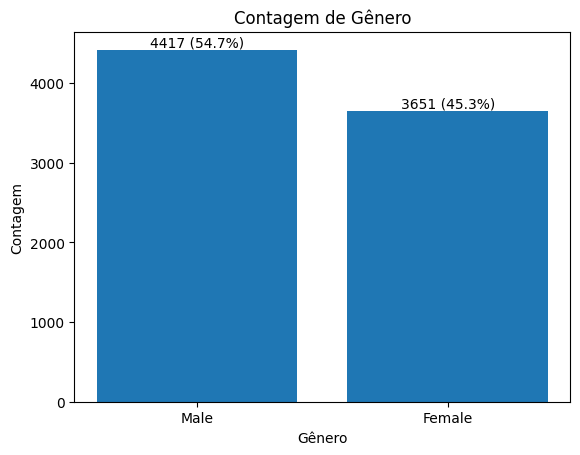

In [46]:
# Calculando os percentuais
gender_percentages = (gender_counts / gender_counts.sum()) * 100

# Plotando o gráfico de barras
plt.bar(gender_counts.index, gender_counts.values)

# Adicionando os valores absolutos e percentuais nos rótulos das barras
for i in range(len(gender_counts)):
    count = gender_counts[i]
    percentage = gender_percentages[i]
    plt.text(i, count, f"{count} ({percentage:.1f}%)", ha='center', va='bottom')

# Configurando o título e os rótulos dos eixos
plt.title('Contagem de Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')

# Exibindo o gráfico
plt.show()

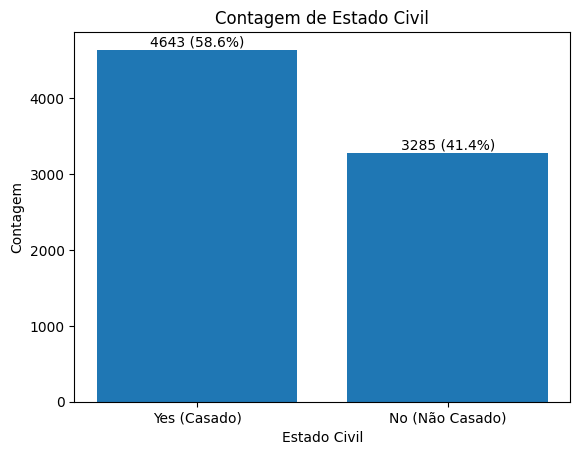

In [48]:
# Substituindo os valores na coluna 'Ever_Married'
df['Ever_Married'] = df['Ever_Married'].replace({'Yes': 'Yes (Casado)', 'No': 'No (Não Casado)'})

# Contagem de valores únicos na coluna 'Ever_Married'
ever_married_counts = df['Ever_Married'].value_counts()

# Calculando os percentuais
ever_married_percentages = (ever_married_counts / ever_married_counts.sum()) * 100

# Plotando o gráfico de barras
plt.bar(ever_married_counts.index, ever_married_counts.values)

# Adicionando os valores absolutos e percentuais nos rótulos das barras
for i in range(len(ever_married_counts)):
    count = ever_married_counts[i]
    percentage = ever_married_percentages[i]
    plt.text(i, count, f"{count} ({percentage:.1f}%)", ha='center', va='bottom')

# Configurando o título e os rótulos dos eixos
plt.title('Contagem de Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Contagem')

# Exibindo o gráfico
plt.show()

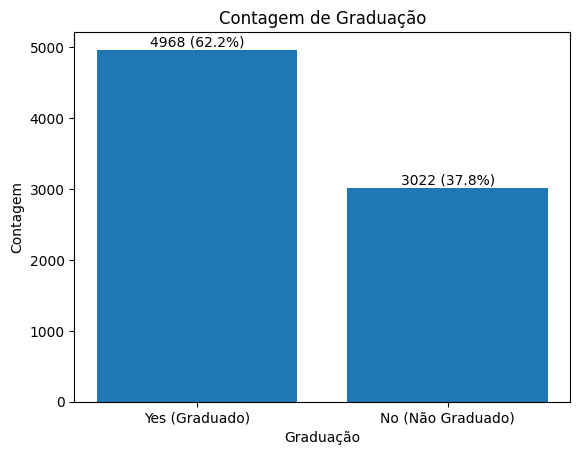

In [49]:
# Substituindo os valores na coluna 'Graduated'
df['Graduated'] = df['Graduated'].replace({'Yes': 'Yes (Graduado)', 'No': 'No (Não Graduado)'})

# Contagem de valores únicos na coluna 'Graduated'
graduated_counts = df['Graduated'].value_counts()

# Calculando os percentuais
graduated_percentages = (graduated_counts / graduated_counts.sum()) * 100

# Plotando o gráfico de barras
plt.bar(graduated_counts.index, graduated_counts.values)

# Adicionando os valores absolutos e percentuais nos rótulos das barras
for i in range(len(graduated_counts)):
    count = graduated_counts[i]
    percentage = graduated_percentages[i]
    plt.text(i, count, f"{count} ({percentage:.1f}%)", ha='center', va='bottom')

# Configurando o título e os rótulos dos eixos
plt.title('Contagem de Graduação')
plt.xlabel('Graduação')
plt.ylabel('Contagem')

# Exibindo o gráfico
plt.show()

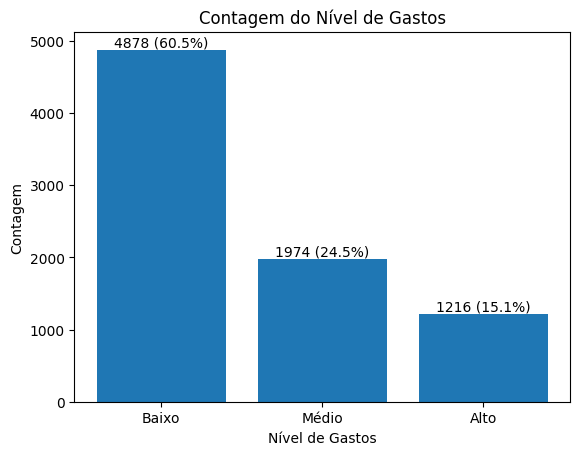

In [50]:
# Substituindo os valores na coluna 'Spending_Score'
df['Spending_Score'] = df['Spending_Score'].replace({'Low': 'Baixo', 'Average': 'Médio', 'High': 'Alto'})

# Contagem de valores únicos na coluna 'Spending_Score'
spending_score_counts = df['Spending_Score'].value_counts()

# Calculando os percentuais
spending_score_percentages = (spending_score_counts / spending_score_counts.sum()) * 100

# Plotando o gráfico de barras
plt.bar(spending_score_counts.index, spending_score_counts.values)

# Adicionando os valores absolutos e percentuais nos rótulos das barras
for i in range(len(spending_score_counts)):
    count = spending_score_counts[i]
    percentage = spending_score_percentages[i]
    plt.text(i, count, f"{count} ({percentage:.1f}%)", ha='center', va='bottom')

# Configurando o título e os rótulos dos eixos
plt.title('Contagem do Nível de Gastos')
plt.xlabel('Nível de Gastos')
plt.ylabel('Contagem')

# Exibindo o gráfico
plt.show()

# 4. Análise biavariada

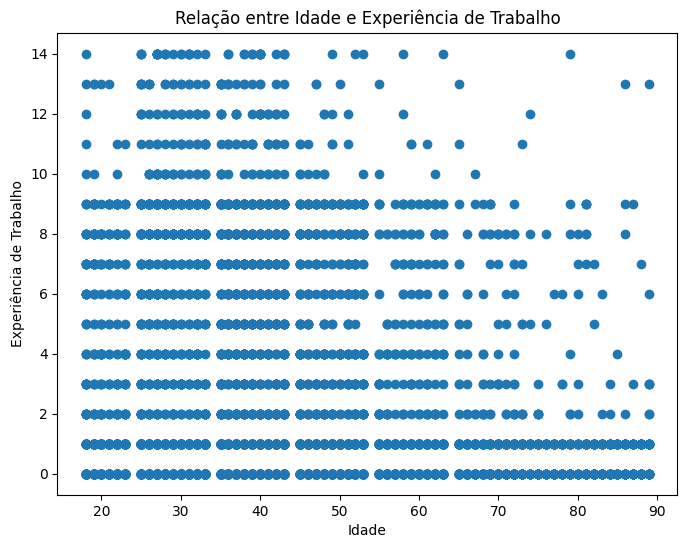

In [65]:
plt.figure(figsize=(8, 6))
plt.scatter(df_train['Age'], df_train['Work_Experience'])
plt.xlabel('Idade')
plt.ylabel('Experiência de Trabalho')
plt.title('Relação entre Idade e Experiência de Trabalho')

plt.show()

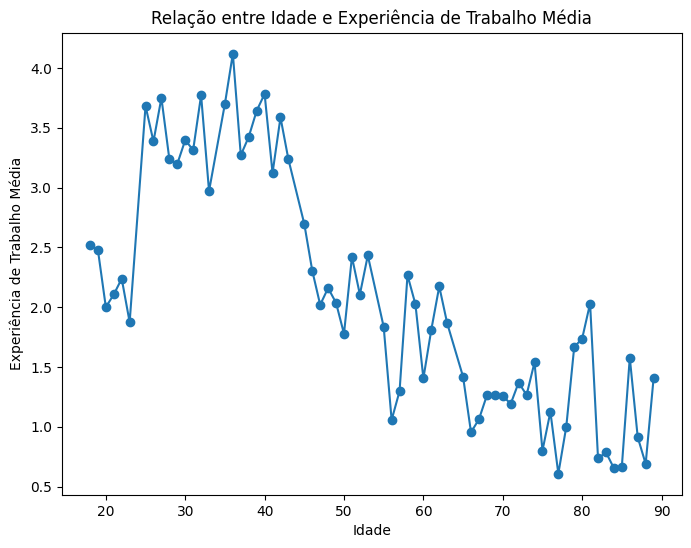

In [66]:
# Agrupando os dados pela idade e calculando a média da experiência de trabalho para cada faixa etária
age_experience_mean = df_train.groupby('Age')['Work_Experience'].mean()

plt.figure(figsize=(8, 6))
plt.plot(age_experience_mean.index, age_experience_mean.values, marker='o')
plt.xlabel('Idade')
plt.ylabel('Experiência de Trabalho Média')
plt.title('Relação entre Idade e Experiência de Trabalho Média')

plt.show()

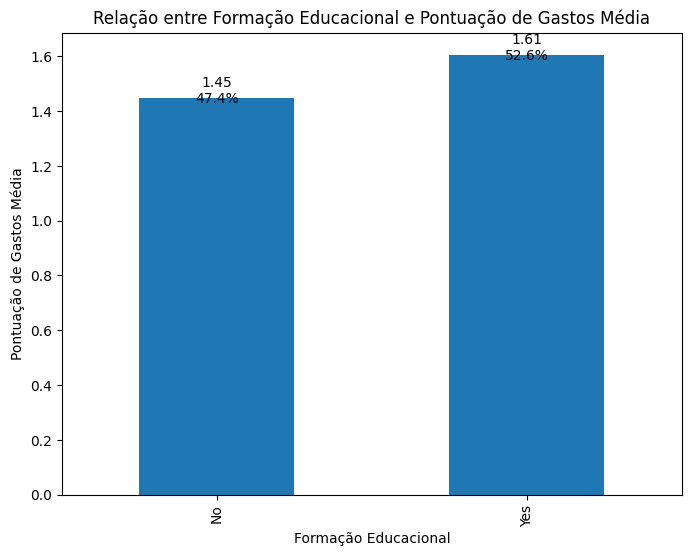

In [72]:
# Mapeamento das categorias de gastos para valores numéricos
spending_mapping = {
    'Low': 1,
    'Average': 2,
    'High': 3
}

# Convertendo os valores de 'Spending_Score' para numéricos usando o mapeamento
df_train['Spending_Score_Num'] = df_train['Spending_Score'].map(spending_mapping)

# Agrupando os dados pela formação educacional e calculando a média da pontuação de gastos numérica para cada categoria
education_spending_mean = df_train.groupby('Graduated')['Spending_Score_Num'].mean()

plt.figure(figsize=(8, 6))
bar_plot = education_spending_mean.plot(kind='bar')

# Adicionando rótulos com números absolutos e percentuais nas colunas
for p in bar_plot.patches:
    bar_plot.annotate(f"{p.get_height():.2f}\n{p.get_height() * 100 / sum(education_spending_mean):.1f}%", 
                      (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5),
                      textcoords='offset points')

plt.xlabel('Formação Educacional')
plt.ylabel('Pontuação de Gastos Média')
plt.title('Relação entre Formação Educacional e Pontuação de Gastos Média')

plt.show()

<Figure size 1000x600 with 0 Axes>

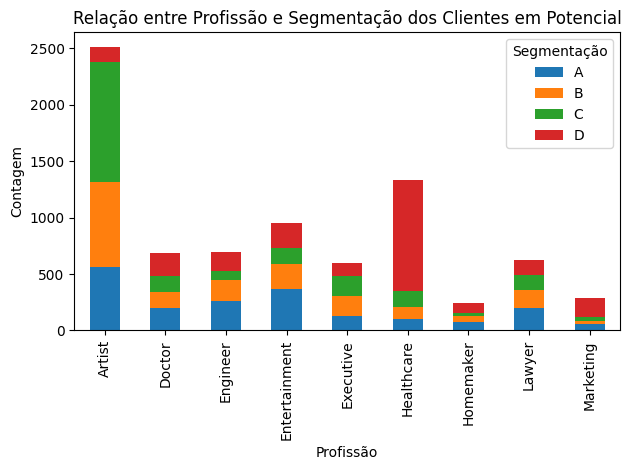

In [73]:
# Contando a frequência de cada combinação de profissão e segmentação
profession_segmentation_counts = df_train.groupby(['Profession', 'Segmentation']).size().unstack()

plt.figure(figsize=(10, 6))
profession_segmentation_counts.plot(kind='bar', stacked=True)

plt.xlabel('Profissão')
plt.ylabel('Contagem')
plt.title('Relação entre Profissão e Segmentação dos Clientes em Potencial')

plt.legend(title='Segmentação', bbox_to_anchor=(1, 1))
plt.tight_layout()

plt.show()

<Figure size 1000x600 with 0 Axes>

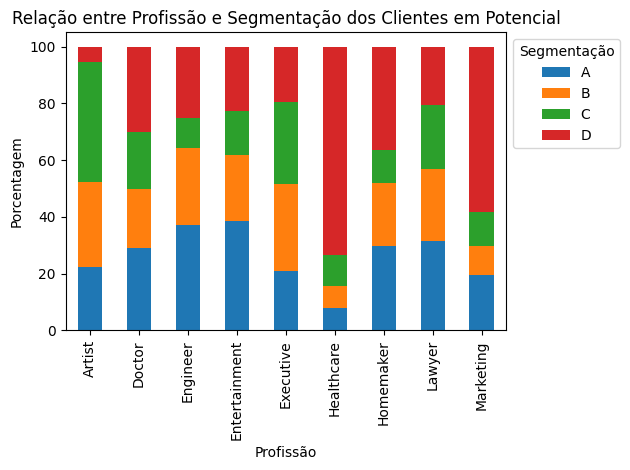

In [83]:
# Contando a frequência de cada combinação de profissão e segmentação
profession_segmentation_counts = df_train.groupby(['Profession', 'Segmentation']).size().unstack()

# Calculando as porcentagens em relação à soma de cada profissão
profession_segmentation_percentages = profession_segmentation_counts.div(profession_segmentation_counts.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 6))
profession_segmentation_percentages.plot(kind='bar', stacked=True)

plt.xlabel('Profissão')
plt.ylabel('Porcentagem')
plt.title('Relação entre Profissão e Segmentação dos Clientes em Potencial')

plt.legend(title='Segmentação', bbox_to_anchor=(1, 1))
plt.tight_layout()

plt.show()

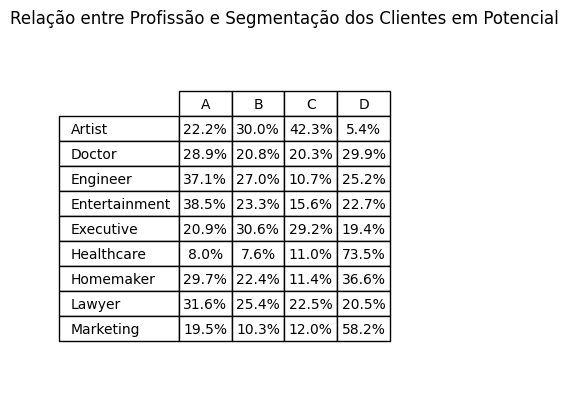

In [84]:
# Contando a frequência de cada combinação de profissão e segmentação
profession_segmentation_counts = df_train.groupby(['Profession', 'Segmentation']).size().unstack()

# Calculando as porcentagens em relação à soma de cada profissão
profession_segmentation_percentages = profession_segmentation_counts.div(profession_segmentation_counts.sum(axis=1), axis=0) * 100

# Plotando tabela com os valores em percentual
cell_text = profession_segmentation_percentages.round(1).astype(str) + '%'
table = plt.table(cellText=cell_text.values, cellLoc='center', colLabels=profession_segmentation_percentages.columns,
                  rowLabels=profession_segmentation_percentages.index, loc='center')

table.scale(1, 1.5)
table.set_fontsize(10)
table.auto_set_column_width([0, 1, 2, 3])

plt.axis('off')
plt.title('Relação entre Profissão e Segmentação dos Clientes em Potencial')

plt.show()

# 5. Análise Multivariada

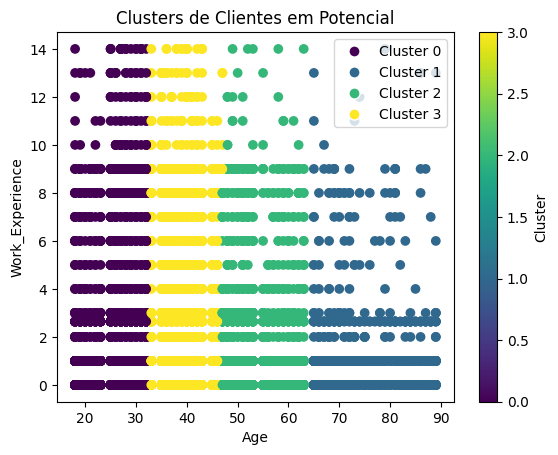

In [114]:
# Pré-processamento da variável "Segmentation"
segmentation_encoder = LabelEncoder()
df_train['Segmentation'] = segmentation_encoder.fit_transform(df_train['Segmentation'])

# Pré-processamento da variável "Spending_Score" usando codificação one-hot
spending_encoder = OneHotEncoder(sparse=False)
spending_score_encoded = spending_encoder.fit_transform(df_train['Spending_Score'].values.reshape(-1, 1))
df_encoded = pd.DataFrame(spending_score_encoded, columns=['Spending_Score_' + str(i) for i in range(spending_score_encoded.shape[1])])
df_train = pd.concat([df_train, df_encoded], axis=1)

# Tratar valores ausentes usando o SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = df_train[['Age', 'Work_Experience', 'Segmentation'] + list(df_encoded.columns)]
X = imputer.fit_transform(X)

# Aplicar o algoritmo K-means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Obter os rótulos dos clusters
labels = kmeans.labels_

# Adicionar os rótulos dos clusters ao DataFrame original
df_train['Cluster'] = labels

# Plotar o gráfico de dispersão com os clusters
scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Work_Experience')
plt.title('Clusters de Clientes em Potencial')
plt.colorbar(scatter, label='Cluster')

# Criar a legenda personalizada
legend_elements = []
for cluster in set(labels):
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(cluster/3), markersize=8, label=f'Cluster {cluster}'))
plt.legend(handles=legend_elements, loc='upper right')

plt.show()